1D MINIMIZATION

Figure 5.13

$f(x)=4 x^{5} -15 x^{4} + 14 x^{3} + 4 $

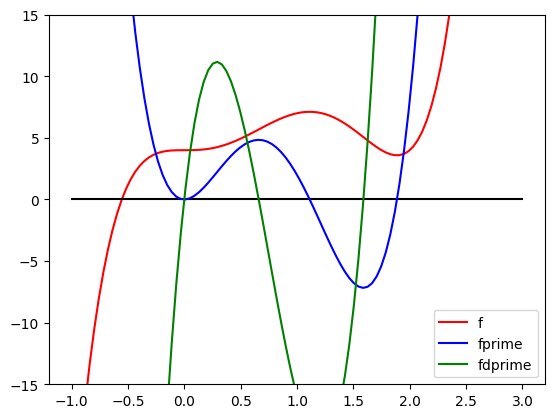

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
def f(x):
   return 4*x**5-15*x**4+14*x**3+4
def fprime(x):
   return 20*x**4-60*x**3+42*x**2
def fdprime(x):
   return 80*x**3-180*x**2+84*x
x = np.linspace(-1.0, 3, 100)

plt.plot(x, f(x), color='red', label='f')
plt.plot(x, 0*x, color='black')
plt.plot(x,fprime(x),color='blue',label='fprime')
plt.plot(x,fdprime(x),color='green',label='fdprime')
plt.ylim([-15, 15])
plt.legend()
plt.show()

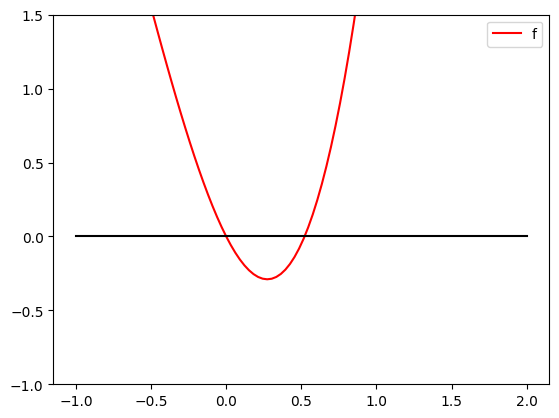

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
def f(x):
   return 1.6*x**3 + 3.0*x**2 - 2.0*x

x = np.linspace(-1.0, 2, 100)

plt.plot(x, f(x), color='red', label='f')
plt.plot(x, 0*x, color='black')

plt.ylim([-1., 1.5])
plt.legend()
plt.show()

In [ ]:
# Author: Alex Gezerlis
# Numerical Methods in Physics with Python (2nd ed., CUP, 2023)

from math import sqrt, exp
#def f(x):
#  return exp(x - sqrt(x)) - x
def f(x):
    return 1.6*x**3 + 3.0*x**2 - 2.0*x
def golden(f, x0, x1, kmax=200, tol=1.e-8):
    varphi = 0.5*(1 + sqrt(5))
    for k in range(1,kmax):
        x2 = x0 + (x1-x0)/(varphi+1)
        x3 = x0 + (x1-x0)*varphi/(varphi+1)
        if f(x3) < f(x2):
            x0 = x2
        else:
            x1 = x3
        xnew = (x0+x1)/2
        xdiff = abs(x1-x0)
        rowf = "{0:2d} {1:1.16f} {2:1.16f} {3:1.16f}"
        print(rowf.format(k, xnew, xdiff, f(xnew)))
        if abs(xdiff) < tol:
            break
    else:
        xnew = None
    return xnew
val = golden(f,0.,1.0); print(val)

 1 0.3090169943749475 0.6180339887498949 -0.2843458848123580
 2 0.1909830056250526 0.3819660112501052 -0.2613968679372004
 3 0.2639320225002104 0.2360679774997897 -0.2894668524892745
 4 0.3090169943749475 0.1458980337503155 -0.2843458848123580
 5 0.2811529493745268 0.0901699437494742 -0.2896060889934776
 6 0.2639320225002104 0.0557280900008412 -0.2894668524892745
 7 0.2745751406263145 0.0344418537486330 -0.2898547435108554
 8 0.2679973318781020 0.0212862362522082 -0.2897297427146002
 9 0.2720626412559937 0.0131556174964248 -0.2898509529236720
10 0.2745751406263145 0.0081306187557833 -0.2898547435108554
11 0.2730223306187435 0.0050249987406414 -0.2898588257968734
12 0.2739820199814934 0.0031056200151418 -0.2898587586841716
13 0.2733888993366722 0.0019193787254996 -0.2898597378116761
14 0.2737554680546009 0.0011862412896422 -0.2898594909252822
15 0.2735289161277086 0.0007331374358574 -0.2898597803249069
16 0.2733888993366723 0.0004531038537848 -0.2898597378116761
17 0.2734754344725284 0.

Gradient Descent in 1D

In [1]:
import numpy as np
def f(x):
  return 1.6*x**3 + 3.0*x**2 - 2.0*x
def df(x):
  return 4.8*x**2+6.0*x-2.0
x = -1.
tol = 0.0001
gamma = .1
counter = 0
while np.abs(df(x))>tol and counter<1000000:
  x = x - gamma*df(x)
  counter += 1
print("The local minimum occurs at approximately x=",x,"f(x)=",f(x))
print("steps taken:",counter-1)

The local minimum occurs at approximately x= 0.27349056110014736 f(x)= -0.2898597854952579
steps taken: 8


Python code for gradient descent (from Gezerlis)

$F(x, y, z) = 2x^2 + 3y^2 + z^2 + xy + xz - 2y$

In [2]:
import numpy as np
def termcrit(xolds,xnews):
  errs = np.abs((xnews - xolds)/xnews)
  return np.sum(errs)
def phi(xs):
  x0, x1, x2 = xs
  return 2.0*x0**2 + 3.0*x1**2 + x2**2 + x0*x1 + x0*x2 - 2.0*x1

def gradient(phi,xs,h=1.e-6):
  n = xs.size
  phi0 = phi(xs)
  Xph = (xs*np.ones((n,n))).T + np.identity(n)*h
  grad = (phi(Xph) - phi0)/h
  return grad
def descent(phi,gradient,xolds,gamma=.15,kmax=200,tol=1.e-8):
  for k in range(1,kmax):
    xnews = xolds - gamma*gradient(phi,xolds)
    err = termcrit(xolds,xnews)
    print(k, xnews, err, phi(xnews))
    if err < tol:
      break
    xolds = np.copy(xnews)
  else:
    xnews = None
  return xnews

xolds = np.array([1.,1.,1.])
xnews = descent(phi, gradient, xolds)
print(xnews)

1 [0.0999997  0.24999955 0.54999985] 12.818219498488412 0.08999964010422201
2 [-0.08000033  0.30999955  0.36999979] 2.930026687001719 -0.23640015839199813
3 [-0.13400033  0.34299955  0.27099975] 0.8645082712172635 -0.3059760930884218
4 [-0.14570033  0.35439956  0.20979973] 0.4041757589974566 -0.32773290014829887
5 [-0.14291032  0.35729455  0.16871471] 0.271143031649386 -0.3374716929793133
6 [-0.13606582  0.35716555  0.13953669] 0.25977046276412485 -0.34271530406677897
7 [-0.12893196  0.35612598  0.11808541] 0.23990856941205974 -0.34572475833569205
8 [-0.12270479  0.35495194  0.10199943] 0.2117633422923644 -0.34748454783952826
9 [-0.11762492  0.35390046  0.08980517] 0.1819438639299977 -0.34851894013562296
10 [-0.11360611  0.35303333  0.08050721] 0.1533234596674437 -0.3491278106572043
11 [-0.11047383  0.3523438   0.07339581] 0.12720122062522318 -0.34948634588780736
12 [-0.10805077  0.351805    0.06794799] 0.10413298211494117 -0.3496974924306775
13 [-0.10618356  0.35138767  0.06377106] 0.

Straight line fit

Kisuallis Example 3.10

1.7 4.0200000000000005 0.6431034482758614 2.926724137931036
0.1519036294618342


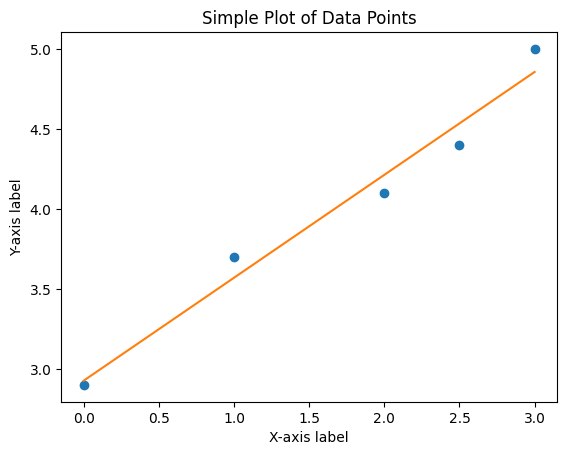

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
xData = np.array([0,1,2,2.5,3])
yData = np.array([2.9,3.7,4.1,4.4,5])
n=len(xData)
z=np.zeros(n)
xx=np.zeros(n)
xbar=sum(xData)/n
ybar=sum(yData)/n
xbx=xbar*sum(xData)
for i in range(n):
    z[i]=z[i]+np.array(xData[i]*yData[i])
    xx[i]=xx[i]+np.array(xData[i]*xData[i])
b=(sum(z)-xbar*sum(yData))/(sum(xx)-xbx)
a=ybar-b*xbar
print(xbar,ybar,b,a)
s0=0
for i in range(n):
    s=s0+(yData[i]-(a+b*xData[i]))**2
    s0=s
print(np.sqrt(s/(n-2)))

plt.plot(xData, yData, 'o')  # 'o' specifies that the points should be plotted as circles
plt.plot(xData,a+b*xData)
# Add labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Simple Plot of Data Points')

# Show the plot
plt.show()